# Arxiv Papers
[source](https://arxiv.org/help/bulk_data)

In [29]:
import urllib.request

url = 'http://export.arxiv.org/api/query?search_query=all:electron&start=0&max_results=10'
data = urllib.request.urlopen(url).read().strip()

# Arxiv Scraper Library

[Arxiv Scraper](https://github.com/mahdisadjadi/arxivscraper)

In [105]:
import os
import pandas as pd
import numpy as np
from collections import defaultdict

import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="darkgrid")

DIR_PATH = '/home/anneke/Documents/ann-mitchell-text-classification/dataset/arxiv/'

In [229]:
data = pd.DataFrame()
for root, dirs, files in os.walk(DIR_PATH, topdown=False):
    for name in files:
        df = pd.read_csv(os.path.join(root, name))
        data = pd.concat([data, df])

In [219]:
len(data)

208768

In [161]:
# Reference : https://arxiv.org/archive/cs

cs_arxiv_cat = {}

cs_arxiv_cat['cs.ai'] = 'Artificial Intelligence'
cs_arxiv_cat['cs.cl'] = 'Computation and Language'
cs_arxiv_cat['cs.cc'] = 'Computational Complexity'
cs_arxiv_cat['cs.ce'] = 'Computational Engineering, Finance, and Science'
cs_arxiv_cat['cs.cg'] = 'Computational Geometry'
cs_arxiv_cat['cs.gt'] = 'Computer Science and Game Theory'
cs_arxiv_cat['cs.cv'] = 'Computer Vision and Pattern Recognition'
cs_arxiv_cat['cs.cy'] = 'Computers and Society'
cs_arxiv_cat['cs.cr'] = 'Cryptography and Security'
cs_arxiv_cat['cs.ds'] = 'Data Structures and Algorithms'
cs_arxiv_cat['cs.db'] = 'Databases'
cs_arxiv_cat['cs.dl'] = 'Digital Libraries'
cs_arxiv_cat['cs.dm'] = 'Discrete Mathematics'
cs_arxiv_cat['cs.dc'] = 'Distributed, Parallel, and Cluster Computing'
cs_arxiv_cat['cs.et'] = 'Emerging Technologies'
cs_arxiv_cat['cs.fl'] = 'Formal Languages and Automata Theory'
cs_arxiv_cat['cs.et'] = 'Emerging Technologies'
cs_arxiv_cat['cs.gl'] = 'General Literature'
cs_arxiv_cat['cs.gr'] = 'Graphics'
cs_arxiv_cat['cs.ar'] = 'Hardware Architecture'
cs_arxiv_cat['cs.hc'] = 'Human-Computer Interaction'
cs_arxiv_cat['cs.ir'] = 'Information Retrieval'
cs_arxiv_cat['cs.it'] = 'Information Theory'
cs_arxiv_cat['cs.lo'] = 'Logic in Computer Science'
cs_arxiv_cat['cs.lg'] = 'Machine Learning'
cs_arxiv_cat['cs.ms'] = 'Mathematical Software'
cs_arxiv_cat['cs.ma'] = 'Multiagent Systems'
cs_arxiv_cat['cs.mm'] = 'Multimedia'
cs_arxiv_cat['cs.ni'] = 'Networking and Internet Architecture'
cs_arxiv_cat['cs.ne'] = 'Neural and Evolutionary Computing'
cs_arxiv_cat['cs.na'] = 'Numerical Analysis'
cs_arxiv_cat['cs.os'] = 'Operating Systems'
cs_arxiv_cat['cs.oh'] = 'Other Computer Science'
cs_arxiv_cat['cs.pf'] = 'Performance'
cs_arxiv_cat['cs.pl'] = 'Programming Languages'
cs_arxiv_cat['cs.ro'] = 'Robotics'
cs_arxiv_cat['cs.si'] = 'Social and Information Networks'
cs_arxiv_cat['cs.se'] = 'Software Engineering'
cs_arxiv_cat['cs.sd'] = 'Sound'
cs_arxiv_cat['cs.sc'] = 'Symbolic Computation'
cs_arxiv_cat['cs.sy'] = 'Systems and Control'

## Data distribution analysis

### By year

In [16]:
year = ['20{:02d}'.format(i) for i in range(9,20)]
year

['2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017',
 '2018',
 '2019']

In [39]:
year_paper_count = dict()

for y in year:
    year_paper_count[y] = 0
    ABS_PATH = os.path.abspath(os.path.join(DIR_PATH, y))
    dir_list = os.listdir(ABS_PATH)
    for d in dir_list:
        data = pd.read_csv(os.path.join(ABS_PATH, d))
        year_paper_count[y] += len(data)

In [44]:
df_year = pd.DataFrame({'year': year, 'count':[year_paper_count[y] for y in year]})

## Note that 2019 is only for 6 months span

In [132]:

# Per categories
# TODO : count each categories. Use Python Counter
categories_count = defaultdict(int)

for y in year:
    year_paper_count[y] = 0
    ABS_PATH = os.path.abspath(os.path.join(DIR_PATH, y))
    dir_list = os.listdir(ABS_PATH)
    for d in dir_list:
        data = pd.read_csv(os.path.join(ABS_PATH, d))
        # categories
        data = data['categories']
        for d in data:
            for w in d.split(' '):
                if 'physics' not in w:
                    if 'cs.' in w:
                        categories_count[w] += 1


In [165]:
categories = sorted(categories_count.items(), key=lambda x:x[1], reverse=True)
categories = [(cs_arxiv_cat[x[0].lower()], x[1]) for x in categories]

df_categories = pd.DataFrame({'category':[c[0] for c in categories[:10]],
                             'count':[c[1] for c in categories[:10]]})

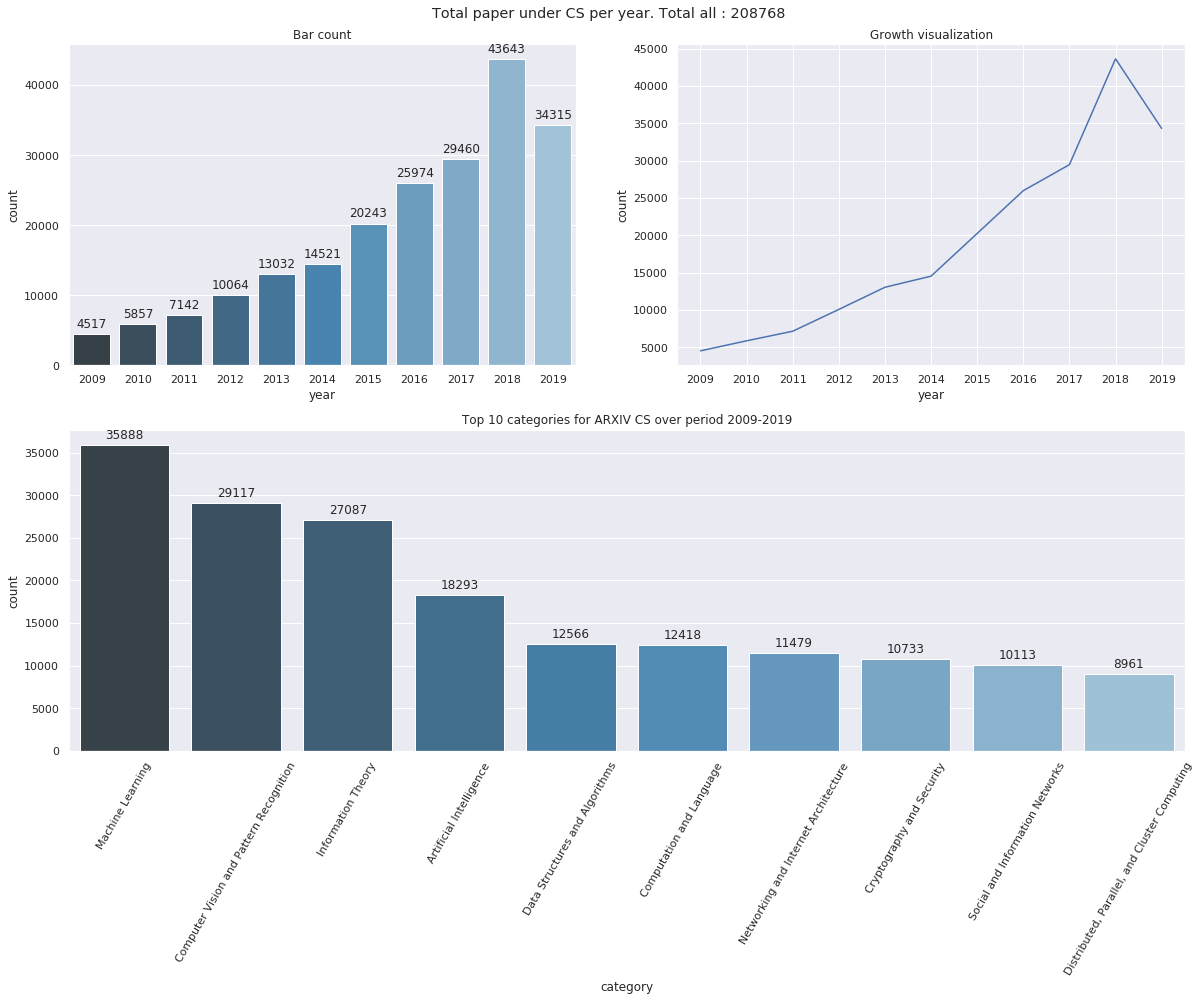

In [195]:
plt.figure(figsize=(20,13))
plt.suptitle('Total paper under CS per year. Total all : {}'.format(np.sum(tot)), y=.92)

sub = plt.subplot(2, 2, 1)
sub.set_title('Bar count')
ax = sns.barplot(x="year", y="count", data=df_year, palette="Blues_d")
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

sub = plt.subplot(2, 2, 2)  
sub.set_title('Growth visualization')
ax = sns.lineplot(x="year", y="count", data=df_year)

sub = plt.subplot(2,1,2)
sub.set_title('Top 10 categories for ARXIV CS over period 2009-2019')
ax = sns.barplot(x="category", y="count", data=df_categories, palette="Blues_d")
ax.set_xticklabels(rotation=60, labels=df_categories['category'])
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

# Test AI VS Crypto
### Data split on (1./3) 

In [ ]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x="categories", data=data)

In [237]:
# investigate any entry with both categories

def label_mapping(label):
    return sorted(label.split(' '))

data['categories'] = data['categories'].apply(label_mapping)

In [235]:
set(data['categories'])

{'cs.cg cs.lg math.at',
 'cs.fl math.ds nlin.cg',
 'cs.ms cs.sc hep-ph math.ac math.ra',
 'cs.cr cs.cv cs.lg stat.ml',
 'cs.it cs.ni math.ap math.it',
 'cs.cl cs.cr cs.sd eess.as stat.ml',
 'cs.oh physics.hist-ph',
 'cs.dc stat.co stat.me stat.ml',
 'cs.ir cs.lg cs.mm stat.ml',
 'cs.gt q-fin.cp',
 'cs.et math.ds',
 'cs.na math.na q-fin.cp',
 'cs.ds cs.lg math.pr stat.co stat.ml',
 'cs.lg math.pr math.st stat.th',
 'cs.sy econ.gn q-fin.ec stat.ap',
 'cs.cg cs.cv math.pr',
 'cs.sd eess.as physics.med-ph',
 'cond-mat.dis-nn cs.ce nlin.cd physics.data-an',
 'cs.cy cs.fl math.oc',
 'astro-ph.im cs.cv eess.sp',
 'cs.cl physics.soc-ph',
 'cs.cl cs.dm cs.si physics.soc-ph',
 'cs.ai cs.lg cs.na stat.ml',
 'cs.cc cs.cr cs.db cs.ds',
 'cs.gt cs.it math.it math.oc nlin.ao',
 'cs.hc cs.ms cs.sc',
 'cs.cg math.at math.mg math.st stat.th',
 'cs.cv cs.ir math.st stat.ml stat.th',
 'cs.ai cs.db cs.lg cs.pf',
 'cond-mat.stat-mech cs.it math.it nlin.ps',
 'cs.sd stat.ml',
 'astro-ph.sr cs.cv cs.it cs.lg 

In [240]:
set_category = set()

for d in data['categories']:
    for i in d:
        set_category.add(i)

In [242]:
set_category

{'adap-org',
 'astro-ph',
 'astro-ph.co',
 'astro-ph.ep',
 'astro-ph.ga',
 'astro-ph.he',
 'astro-ph.im',
 'astro-ph.sr',
 'chao-dyn',
 'cmp-lg',
 'comp-gas',
 'cond-mat',
 'cond-mat.dis-nn',
 'cond-mat.mes-hall',
 'cond-mat.mtrl-sci',
 'cond-mat.other',
 'cond-mat.quant-gas',
 'cond-mat.soft',
 'cond-mat.stat-mech',
 'cond-mat.str-el',
 'cond-mat.supr-con',
 'cs.ai',
 'cs.ar',
 'cs.cc',
 'cs.ce',
 'cs.cg',
 'cs.cl',
 'cs.cr',
 'cs.cv',
 'cs.cy',
 'cs.db',
 'cs.dc',
 'cs.dl',
 'cs.dm',
 'cs.ds',
 'cs.et',
 'cs.fl',
 'cs.gl',
 'cs.gr',
 'cs.gt',
 'cs.hc',
 'cs.ir',
 'cs.it',
 'cs.lg',
 'cs.lo',
 'cs.ma',
 'cs.mm',
 'cs.ms',
 'cs.na',
 'cs.ne',
 'cs.ni',
 'cs.oh',
 'cs.os',
 'cs.pf',
 'cs.pl',
 'cs.ro',
 'cs.sc',
 'cs.sd',
 'cs.se',
 'cs.si',
 'cs.sy',
 'econ.em',
 'econ.gn',
 'econ.th',
 'eess.as',
 'eess.iv',
 'eess.sp',
 'eess.sy',
 'gr-qc',
 'hep-ex',
 'hep-lat',
 'hep-ph',
 'hep-th',
 'math-ph',
 'math.ac',
 'math.ag',
 'math.ap',
 'math.at',
 'math.ca',
 'math.co',
 'math.ct',
 'ma

In [245]:
single_category = []

for d in data['categories']:
    for i in d:
        single_category.append(i)

In [261]:
len(single_category)

single_category = pd.DataFrame({'cat':single_category})

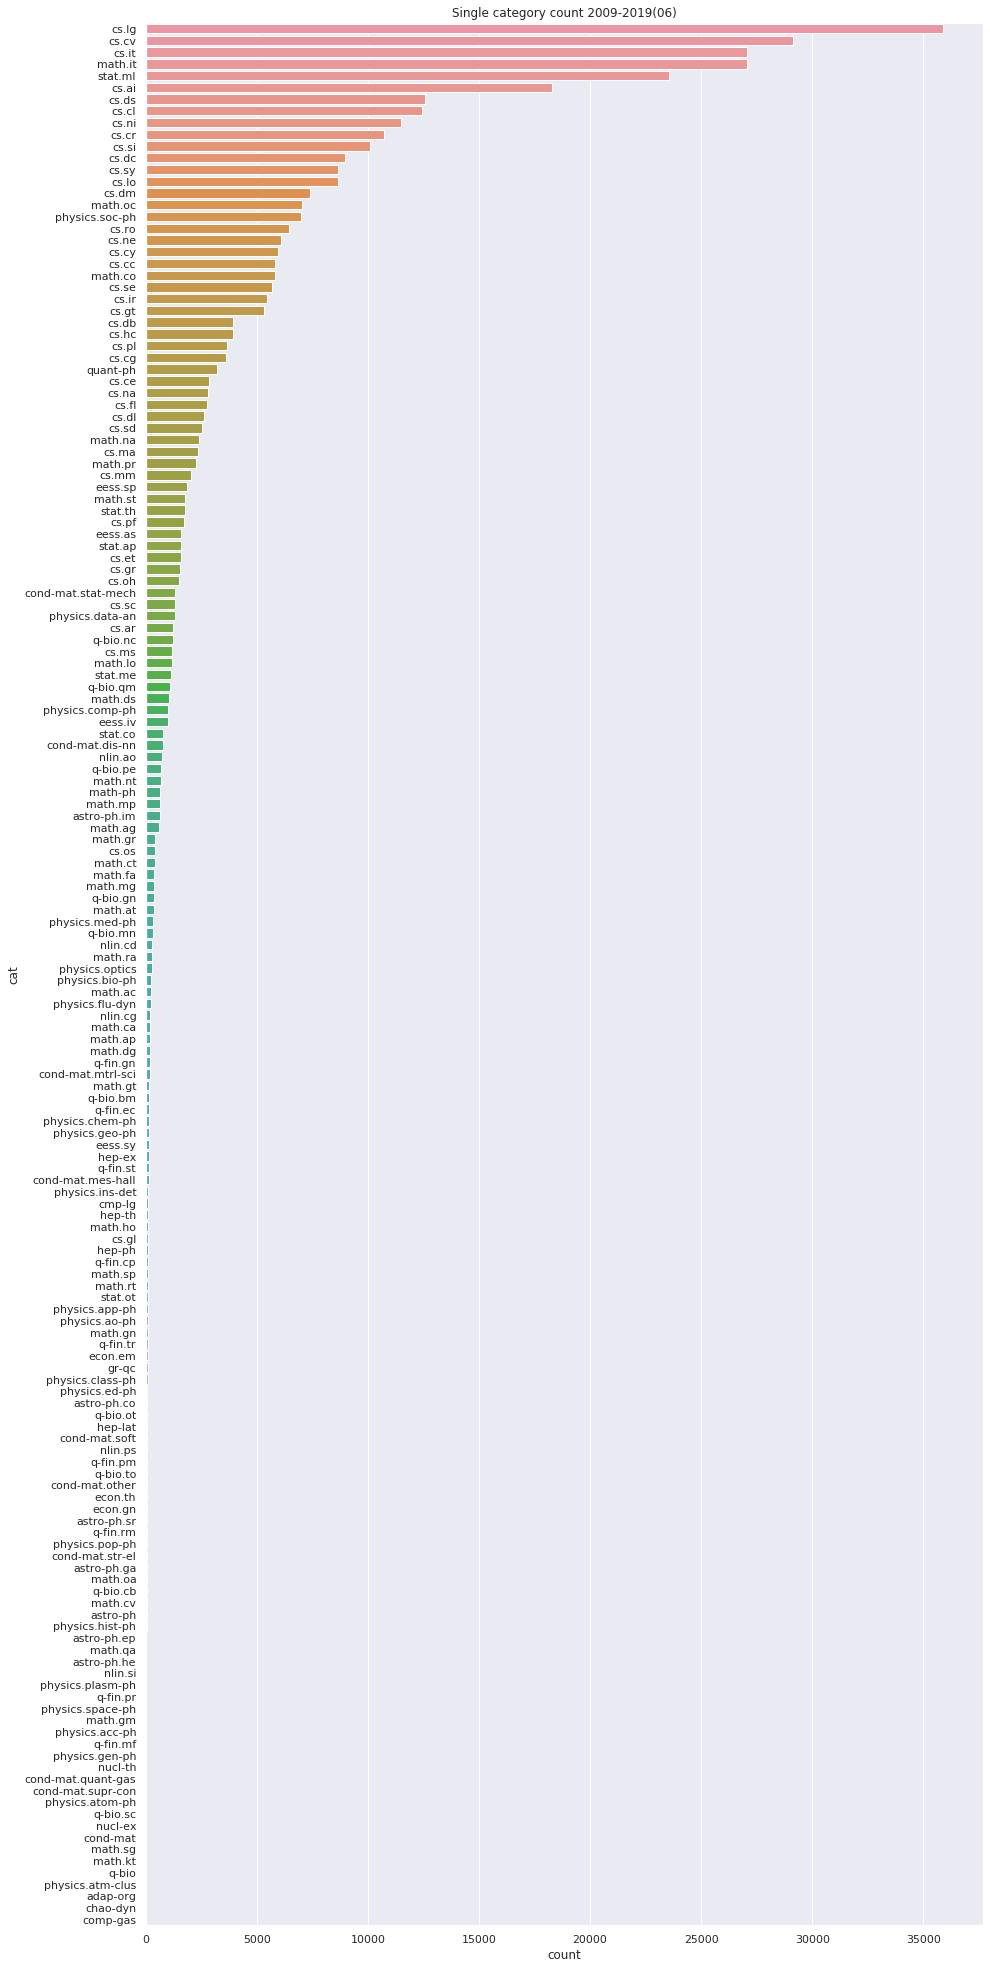

In [271]:
plt.figure(figsize=(15, 35))
plt.title('Single category count 2009-2019(06)')
ax = sns.barplot(x="count", y="cat", data=single_category_df)
# ax.set_yticklabels(rotation=90, labels=single_category_df['cat'])
for p in ax.patches:
    if p.get_height() > 10000:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

In [260]:
from collections import Counter 
c = Counter(single_category)
c.most_common(10)

[('cs.lg', 35888),
 ('cs.cv', 29117),
 ('cs.it', 27087),
 ('math.it', 27087),
 ('stat.ml', 23564),
 ('cs.ai', 18293),
 ('cs.ds', 12566),
 ('cs.cl', 12418),
 ('cs.ni', 11479),
 ('cs.cr', 10733)]

In [264]:
single_category_df = pd.DataFrame({'cat':[x[0] for x in c.most_common()],
                                  'count':[x[1] for x in c.most_common()]})

In [244]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(vocabulary=set_category)
cat = cv.fit_transform(data['categories'])

AttributeError: 'list' object has no attribute 'lower'

In [232]:
cat.shape

(208768, 154)

In [233]:
cv.vocabulary_

{'cs': 35,
 'lg': 84,
 'math': 88,
 'pr': 125,
 'st': 146,
 'stat': 147,
 'ap': 7,
 'th': 151,
 'sy': 150,
 'oc': 110,
 'it': 80,
 'dm': 46,
 'sd': 137,
 'na': 101,
 'fa': 58,
 'lo': 85,
 'me': 89,
 'co': 29,
 'gt': 70,
 'ce': 21,
 'db': 40,
 'ds': 47,
 'cc': 19,
 'physics': 120,
 'plasm': 122,
 'ph': 119,
 'quant': 130,
 'cv': 37,
 'cond': 32,
 'mat': 87,
 'mech': 90,
 'ai': 4,
 'si': 140,
 'cg': 22,
 'dg': 43,
 'bio': 15,
 'pe': 117,
 'cr': 34,
 'nt': 107,
 'soc': 141,
 'ml': 95,
 'fin': 59,
 'cp': 33,
 'data': 39,
 'an': 5,
 'mp': 98,
 'comp': 30,
 'sc': 135,
 'ac': 0,
 'ma': 86,
 'cy': 38,
 'se': 138,
 'nc': 102,
 'ni': 104,
 'et': 56,
 'fl': 60,
 'optics': 112,
 'at': 12,
 'mm': 96,
 'ne': 103,
 'qm': 129,
 'dis': 44,
 'nn': 106,
 'nlin': 105,
 'cd': 20,
 'pf': 118,
 'hep': 74,
 'lat': 83,
 'ag': 3,
 'dc': 41,
 'pl': 121,
 'dl': 45,
 'ms': 99,
 'ir': 79,
 'ca': 17,
 'ro': 133,
 'hc': 72,
 'gr': 69,
 'oh': 111,
 'cl': 25,
 'ar': 9,
 'ao': 6,
 'sp': 143,
 'ins': 78,
 'det': 42,
 'ot

In [204]:
# to do if 'cs.ai' or 'cs'crypto' in categories
title = []
abstract = []
label = []


for y in year:
    ABS_PATH = os.path.abspath(os.path.join(DIR_PATH, y))
    dir_list = os.listdir(ABS_PATH)
    for d in dir_list:
        data = pd.read_csv(os.path.join(ABS_PATH, d))
        # categories
        #data = data['categories']
        for d in data['categories']:
            for w in d.split(' '):
                if 'physics' not in w:
                    if 'cs.ai' in w:
                        title.append(data['title'])
                        abstract.append(data['abstract'])
                        label.append('cs.ai')
                    elif 'cs.cr' in w:
                        title.append(data['title'])
                        abstract.append(data['abstract'])
                        label.append('cs.cr')

In [208]:
abstract[:10]

[0      in a quantum mechanical model, diosi, feldmann...
 1      sparse code division multiple access (cdma), a...
 2      in a sensor network, in practice, the communic...
 3      the subject of collective attention is central...
 4      this paper presents new low-complexity lattice...
                              ...                        
 643    we study the advantage of pure-state quantum c...
 644    is the universe computable? if yes, is it comp...
 645    qubit networks with long-range interactions in...
 646    searching and sorting used as a subroutine in ...
 647    secure key distribution among two remote parti...
 Name: abstract, Length: 648, dtype: object,
 0      in a quantum mechanical model, diosi, feldmann...
 1      sparse code division multiple access (cdma), a...
 2      in a sensor network, in practice, the communic...
 3      the subject of collective attention is central...
 4      this paper presents new low-complexity lattice...
                           

In [201]:
tot[0].head()

,id,title,categories,abstract,doi,created,updated,authors
0,0707.0805,a new generalization of chebyshev inequality f...,math.st cs.lg math.pr stat.ap stat.th,"in this article, we derive a new generalizatio...",NaN,2007-07-05,2011-06-24,['chen']
1,0707.0878,risk analysis in robust control -- making the ...,math.oc cs.sy math.st stat.th,"this paper offers a critical view of the ""wors...",NaN,2007-07-05,NaN,"['chen', 'aravena', 'zhou']"
2,0711.2801,inverse sampling for nonasymptotic sequential ...,math.st cs.lg math.pr stat.th,"in this paper, we consider the nonasymptotic s...",NaN,2007-11-18,2007-12-02,['chen']
3,0804.3215,multicast capacity of optical wdm packet ring ...,cs.it math.it,packet-switching wdm ring networks with a hots...,10.1016/j.osn.2011.05.002,2008-04-20,NaN,"['der heiden', 'sortais', 'scheutzow', 'reissl..."
4,0804.3241,a synthesizer based on frequency-phase analysi...,cs.sd cs.dm,this article introduces an effective generaliz...,NaN,2008-04-21,2013-11-23,['vergara']
